In [21]:
import seaborn as sns, pandas as pd, numpy as np
from sklearn.svm import OneClassSVM
from sklearn.model_selection import cross_val_score, StratifiedKFold, ParameterGrid, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.lines as mlines
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats

data = pd.read_csv('./results/features_df.csv')
data

,Corpus,Type,Avg Word Length,Avg Sentence Length,TTR,MATTR,Char Dist Entr,Word Dist Entr,Text Entr,Lex Entr,Rev Lex Entr
0,id,nat,6.173,18.164,5.782,0.699,4.072,11.142,3.518,1.956,1.976
1,tl,nat,5.119,21.102,7.593,0.611,3.895,9.991,3.824,1.884,1.917
2,tr,nat,6.630,14.458,14.097,0.828,4.386,13.151,4.114,1.562,1.656
3,en,nat,5.087,21.301,6.079,0.697,4.167,10.673,4.116,1.926,1.981
4,de,nat,6.206,16.907,12.128,0.771,4.230,11.601,3.965,1.608,1.666
5,fr,nat,5.160,23.120,7.461,0.721,4.179,10.711,3.497,1.793,1.865
6,eo,con,5.175,18.909,10.708,0.692,4.164,10.923,3.858,1.801,1.893
7,lfn,con,4.221,19.532,5.063,0.601,3.912,9.316,3.936,2.027,2.114
8,ia,con,5.050,19.547,6.880,0.607,4.032,10.005,3.336,1.821,1.906
9,io,con,4.594,14.484,3.433,0.557,4.077,8.055,1.157,1.985,2.069


One Class SVM

In [8]:
# X, y = data.iloc[:,2:].values.round(decimals=3), data.iloc[:,1].map({'con':-1, 'nat':1}).values
# scaler = StandardScaler()
# strat_kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
# svm = OneClassSVM()

# for train_idx, test_idx in strat_kfold.split(X, y):
#     X_train, X_test = X[train_idx], X[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]
    
#     # Extract 'nat' class for training
#     X_train_nat = X_train[y_train == 1]
    
#     # Normalize data
#     X_train_scaled = scaler.fit_transform(X_train_nat)
#     X_test_scaled = scaler.transform(X_test)
    
#     # Train
#     svm.fit(X_train_scaled)
    
#     # Predict
#     predictions = svm.predict(X_test_scaled)
    
#     # Evaluate
#     precision = precision_score(y_test, predictions, pos_label=-1)
#     recall = recall_score(y_test, predictions, pos_label=-1)
#     f1 = f1_score(y_test, predictions, pos_label=-1)
    
#     print(f"Precision: {precision}, Recall: {recall}, F1-score: {f1}")

In [9]:
# df = pd.read_csv('./results/features_df.csv')
# train_df = df.drop(df[df['Type'] == 'con'].index)
# test_df = df.drop(df[df['Type'] == 'nat'].index)

# scaler = StandardScaler()
# # Training on only natural languages
# X_train = scaler.fit_transform(train_df.iloc[:,2:].values.round(decimals=3))
# # Testing on constructed languages
# X_test = scaler.fit_transform(test_df.iloc[:,2:].values.round(decimals=3))

# # One-Class SVM Model
# # Do one for both: "in" class as conlangs and as natlangs
# svm = OneClassSVM(nu=0.01, kernel='rbf', gamma=0.00005, verbose=True)
# svm.fit(X_train)

# svm_pred = svm.predict(X_test)
# scores = svm.score_samples(X_test)
# print({lang: pred for lang, pred in zip(test_df['Corpus'], scores)})
# # print({lang: pred for lang, pred in zip(test_df['Corpus'], svm_pred)})

{'eo': 0.04120597173432923, 'lfn': 0.028173381272779647, 'ia': 0.04246367316493513, 'io': 0.03649438466435061}


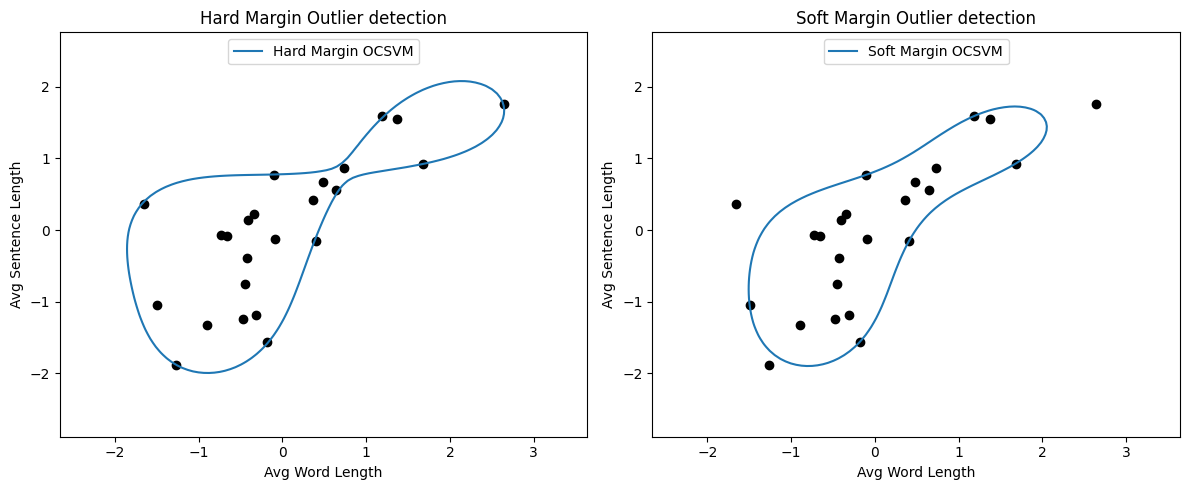

In [22]:
# Example visualization using only 2 columns from the data: Avg Word Length and Avg Sentence Length

# scaler = MinMaxScaler()
data = pd.read_csv('./results/features_df.csv')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,2:].values.round(decimals=3))
# normalized_data = scaler.fit_transform(data.iloc[:,2:].values.round(decimals=3))
# X = normalized_data[:,[2,3]]
X = scaled_data[:,[2,3]]

estimators_hard_margin = {
   "Hard Margin OCSVM": OneClassSVM(nu=0.01, gamma=0.35),  # Very small nu for hard margin
}
estimators_soft_margin = {
   "Soft Margin OCSVM": OneClassSVM(nu=0.25, gamma=0.35),  # Nu between 0 and 1 for soft margin
}

# Plotting setup
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
colors = ["tab:blue", "tab:orange", "tab:red"]
legend_lines = []

# Hard Margin OCSVM
ax = axs[0]
for color, (name, estimator) in zip(colors, estimators_hard_margin.items()):
   estimator.fit(X)
   DecisionBoundaryDisplay.from_estimator(
       estimator,
       X,
       response_method="decision_function",
       plot_method="contour",
       levels=[0],
       colors=color,
       ax=ax,
   )
   legend_lines.append(mlines.Line2D([], [], color=color, label=name))
ax.scatter(X[:, 0], X[:, 1], color="black")
ax.legend(handles=legend_lines, loc="upper center")
ax.set(
   xlabel="Avg Word Length",
   ylabel="Avg Sentence Length",
   title="Hard Margin Outlier detection",
)

# Soft Margin OCSVM
ax = axs[1]
legend_lines = []
for color, (name, estimator) in zip(colors, estimators_soft_margin.items()):
   estimator.fit(X)
   DecisionBoundaryDisplay.from_estimator(
       estimator,
       X,
       response_method="decision_function",
       plot_method="contour",
       levels=[0],
       colors=color,
       ax=ax,
   )
legend_lines.append(mlines.Line2D([], [], color=color, label=name))
ax.scatter(X[:, 0], X[:, 1], color="black")
ax.legend(handles=legend_lines, loc="upper center")
ax.set(
   xlabel="Avg Word Length",
   ylabel="Avg Sentence Length",
   title="Soft Margin Outlier detection",
)
plt.tight_layout()
plt.show()

In [62]:
# OneClassSVM without finetuning

features = data.drop(columns=['Corpus', 'Type'])
target = np.where(data['Type'] == 'nat', 1, -1)

scaler = StandardScaler()
# Train on target == 'nat' (natural languages)
X_train = scaler.fit_transform(features[target == 1])

# nu=0.25 means around 25% of my data are anomalies (6/24 languages are constructed)
clf = OneClassSVM(kernel='rbf', gamma='auto', nu=0.25, verbose=True)
clf.fit(X_train)

X_test = scaler.transform(features)
predictions = clf.predict(X_test)
scores = clf.score_samples(X_test)
print({lang: pred for lang, pred in zip(data['Corpus'], scores)})

predicted_types = np.where(predictions == 1, 'nat', 'con')
print({lang: pred for lang, pred in zip(data['Corpus'], predicted_types)})
# print(predictions)

# Model Performance report 

report = classification_report(data['Type'], predicted_types, target_names=['con', 'nat'], output_dict=True)
report.update({"accuracy": {"precision": None, "recall": None, "f1-score": report["accuracy"], "support": report['macro avg']['support']}})
ocsvm_without_finetuning_report = pd.DataFrame(report).transpose()
ocsvm_without_finetuning_report.to_csv('./results/ocsvm_without_finetuning_report.csv')

[LibSVM]*.*
optimization finished, #iter = 21
obj = 2.262393, rho = 1.005561
nSV = 8, nBSV = 0
{'id': 1.0059706464222609, 'tl': 1.0056166902594403, 'tr': 1.0445398591789548, 'en': 1.0538492119015497, 'de': 1.073204033136967, 'fr': 1.1921488897100996, 'eo': 1.2329405462878067, 'lfn': 0.5732370535810485, 'ia': 0.9733380588376592, 'io': 0.011075789337116504, 'pl': 1.005474060859679, 'vi': 1.0053420939366102, 'fi': 1.0056626753690936, 'it': 1.0055071569762632, 'af': 1.0550314404934795, 'nl': 1.2606923208854333, 'es': 1.06711435419983, 'oc': 1.0053420988097983, 'da': 1.1180340805166928, 'sv': 1.2104436302165154, 'is': 1.0055758094935445, 'hu': 1.0208392906155717, 'vo': 0.010788450315407316, 'avk': 0.4958082541946347}
{'id': 'nat', 'tl': 'nat', 'tr': 'nat', 'en': 'nat', 'de': 'nat', 'fr': 'nat', 'eo': 'nat', 'lfn': 'con', 'ia': 'con', 'io': 'con', 'pl': 'con', 'vi': 'con', 'fi': 'nat', 'it': 'con', 'af': 'nat', 'nl': 'nat', 'es': 'nat', 'oc': 'con', 'da': 'nat', 'sv': 'nat', 'is': 'nat', 'hu

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(ar

In [65]:
# OCSVM Finetuning
# Brute force approach (ParameterGrid)

# gamma defines how much influence a single training example has. Smaller value means a larger radius of influence for each example, and vice versa
# typical gamma values γ∈[10^−6,10^0] are used for the RBF kernel, with common initial guesses around γ∈[0.001,1]
# nu is the upper bound on the fraction of training errors and a lower bound of support vectors. Controls proportion of outliers allowed
# typical nu values are between 0 and 1, with common initial ranges around ν∈[0.01,0.5]

features = data.drop(columns=['Corpus', 'Type'])
target = np.where(data['Type'] == 'nat', 1, -1)

scaler = StandardScaler()
# Train on target == 'nat' (natural languages)
X_train = scaler.fit_transform(features[target == 1])
X_test = scaler.transform(features)

param_grid = {
    'gamma': [0.000001, 0.0001, 0.001, 0.01, 0.1, 1],
    'nu': [0.01, 0.05, 0.1, 0.25, 0.5]
}

grid = ParameterGrid(param_grid)
results = []
for params in grid:
    clf = OneClassSVM(kernel='rbf', gamma=params['gamma'], nu=params['nu'])
    clf.fit(X_train)
    predictions = clf.predict(X_test)
    predicted_types = np.where(predictions == 1, 'nat', 'con')
    precision = precision_score(data['Type'], predicted_types, pos_label='con')
    recall = recall_score(data['Type'], predicted_types, pos_label='con')
    f1 = f1_score(data['Type'], predicted_types, pos_label='con')
    
    results.append({
        'gamma': params['gamma'],
        'nu': params['nu'],
        'precision': precision,
        'recall': recall,
        'f1': f1
    })
    
ocsvm_parameter_search_results_df = pd.DataFrame(results)
ocsvm_parameter_search_results_df.to_csv('./results/ocsvm_parameter_search_results_df.csv')
best_params = ocsvm_parameter_search_results_df.sort_values(by='f1', ascending=False).iloc[0]
print(f"Best Params: Gamma={best_params['gamma']}, Nu={best_params['nu']}")
print(best_params)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(ar

Best Params: Gamma=0.01, Nu=0.01
gamma        0.010000
nu           0.010000
precision    0.833333
recall       0.833333
f1           0.833333
Name: 15, dtype: float64


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [66]:
# OCSVM with Finetuned Hyperparams

features = data.drop(columns=['Corpus', 'Type'])
target = np.where(data['Type'] == 'nat', 1, -1)

scaler = StandardScaler()
# Train on target == 'nat' (natural languages)
X_train = scaler.fit_transform(features[target == 1])

clf = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.01, verbose=True)
clf.fit(X_train)

X_test = scaler.transform(features)
predictions = clf.predict(X_test)
scores = clf.score_samples(X_test)
print({lang: pred for lang, pred in zip(data['Corpus'], scores)})

predicted_types = np.where(predictions == 1, 'nat', 'con')
print({lang: pred for lang, pred in zip(data['Corpus'], predicted_types)})
# print(predictions)

# Model performance report 

report = classification_report(data['Type'], predicted_types, target_names=['con', 'nat'], output_dict=True)
report.update({"accuracy": {"precision": None, "recall": None, "f1-score": report["accuracy"], "support": report['macro avg']['support']}})
ocsvm_with_finetuning_report = pd.DataFrame(report).transpose()
ocsvm_with_finetuning_report.to_csv('./results/ocsvm_with_finetuning_report.csv')

[LibSVM]*
optimization finished, #iter = 8
obj = 0.010317, rho = 0.114511
nSV = 3, nBSV = 0
{'id': 0.12380714740374316, 'tl': 0.1141638028714953, 'tr': 0.1221699190985702, 'en': 0.126643670015038, 'de': 0.12518941865005612, 'fr': 0.12483111836109402, 'eo': 0.12667772896294083, 'lfn': 0.10956471383171104, 'ia': 0.11281688950852195, 'io': 0.059860283410902715, 'pl': 0.12270366906678057, 'vi': 0.11468401452745784, 'fi': 0.11468401483514465, 'it': 0.1223789966258729, 'af': 0.11987688190236798, 'nl': 0.12512287672441744, 'es': 0.11831548386184919, 'oc': 0.11939016072696765, 'da': 0.1272667630483933, 'sv': 0.12953121612106266, 'is': 0.12345060409991504, 'hu': 0.12391309258043598, 'vo': 0.062179131543614485, 'avk': 0.10809171687902658}
{'id': 'nat', 'tl': 'con', 'tr': 'nat', 'en': 'nat', 'de': 'nat', 'fr': 'nat', 'eo': 'nat', 'lfn': 'con', 'ia': 'con', 'io': 'con', 'pl': 'nat', 'vi': 'nat', 'fi': 'nat', 'it': 'nat', 'af': 'nat', 'nl': 'nat', 'es': 'nat', 'oc': 'nat', 'da': 'nat', 'sv': 'nat',

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(ar

One-Class SVM Visualization (Decision Boundary)

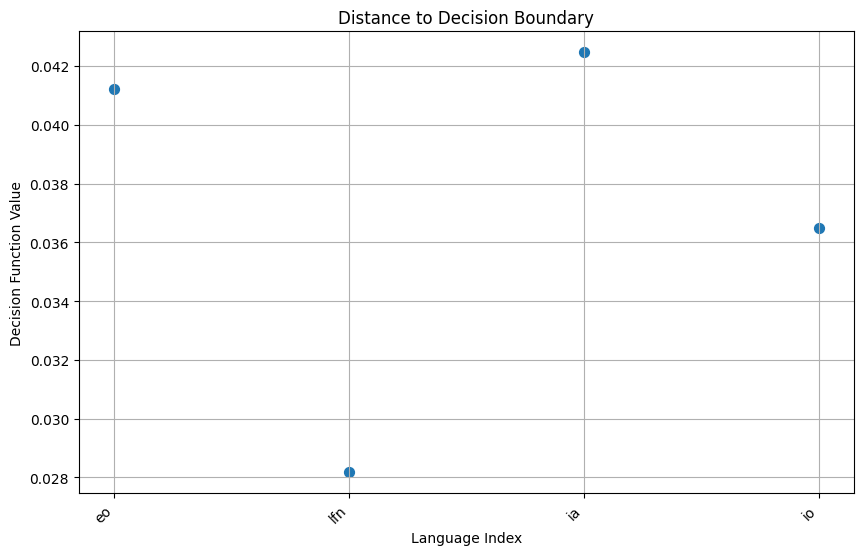

In [10]:
# Plot decision function values
# Maybe try following https://stackoverflow.com/questions/66186272/how-to-plot-the-decision-boundary-of-a-one-class-svm for better visualization
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(scores)), scores, marker='o', s=50)
plt.xlabel('Language Index')
plt.ylabel('Decision Function Value')
plt.title('Distance to Decision Boundary')
plt.xticks(np.arange(len(scores)), test_df['Corpus'], rotation=45, ha='right')  # Use language names as x-axis`` labels
plt.grid(True)
plt.show()

In [ ]:
# Plot decision function (better visualization with reduced dimensionality)



ValueError: n_features must be equal to 2. Got 7 instead.

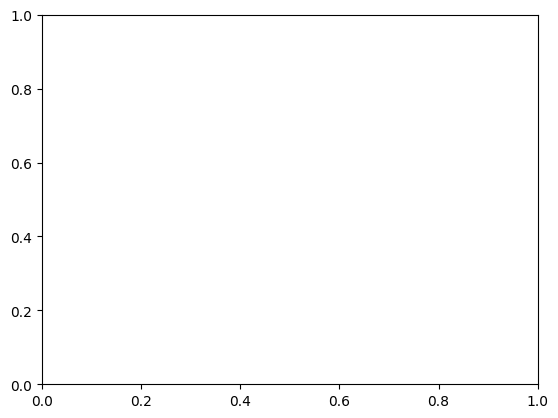

In [12]:
estimators = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}

X = scaler.fit_transform(df.iloc[:,2:].values.round(decimals=3))

fig, ax = plt.subplots()
colors = ["tab:blue", "tab:orange", "tab:red"]
# Learn a frontier for outlier detection with several classifiers
legend_lines = []
for color, (name, estimator) in zip(colors, estimators.items()):
    estimator.fit(X)
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="decision_function",
        plot_method="contour",
        levels=[0],
        colors=color,
        ax=ax,
    )
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))


ax.scatter(X[:, 0], X[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
ax.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
ax.legend(handles=legend_lines, loc="upper center")
_ = ax.set(
    xlabel="ash",
    ylabel="malic_acid",
    title="Outlier detection on a real data set (wine recognition)",
)

In [ ]:
# from sklearn.inspection import DecisionBoundaryDisplay

# disp = DecisionBoundaryDisplay.from_estimator(
#     svm, X_test, response_method="predict", xlabel=, ylabel=, alpha=0.5
# )

Local Outlier Factor

In [ ]:
# lof = LocalOutlierFactor(n_neighbors=18, algorithm='auto', novelty=True, contamination=0.1)
# lof.fit(X_train)

# lof_pred = lof.predict(X_test)
# print({lang: pred for lang, pred in zip(test_df['corpus'], lof_pred)})

Decision Tree

In [ ]:
X, y = data.iloc[:,2:].values.round(decimals=3), data.iloc[:,1].map({'con':0, 'nat':1}).values

clf = tree.DecisionTreeClassifier(class_weight='balanced', random_state=42)

param_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

kfold = KFold(n_splits=len(X), shuffle=True, random_state=42)

# Try using F1 score (due to inbalanced data)
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=kfold,
    scoring='accuracy',
    verbose=1,
)

grid_search.fit(X, y)
print("Best parameters: ", grid_search.best_params_)

# Best estimator fitted with best parameters
best_clf = grid_search.best_estimator_

plt.figure(figsize=(20, 10))
tree.plot_tree(best_clf, filled=True, feature_names=['Avg Word Length', 'Avg Sentence Length', 'TTR', 'MATTR', 'Char Entr', 'Word Entr', 'Text Entr', 'Lex Entr', 'Rev Lex Entr'], class_names=['con', 'nat'], rounded=True, fontsize=10)
plt.show()

Leave One Out

In [ ]:
# loo = LeaveOneOut()
# cross_val_scores = cross_val_score(clf, X, y, cv=kfold)

# predictions = clf.predict(X)
# print(accuracy_score(y, predictions))

# print("Cross-validation scores: ", cross_val_scores)
# print("Mean accuracy: ", cross_val_scores.mean())

Random Forest

In [16]:
# Random Forest Without Finetuning

X, y = data.iloc[:,2:].values.round(decimals=3), data.iloc[:,1].map({'con':0, 'nat':1}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['con', 'nat'])
print(report)

Accuracy: 0.8
              precision    recall  f1-score   support

         con       0.50      1.00      0.67         1
         nat       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

Feature Importances: [0.20548117 0.07407555 0.08791011 0.24041635 0.0329125  0.06191529
 0.05978145 0.12145547 0.11605211]


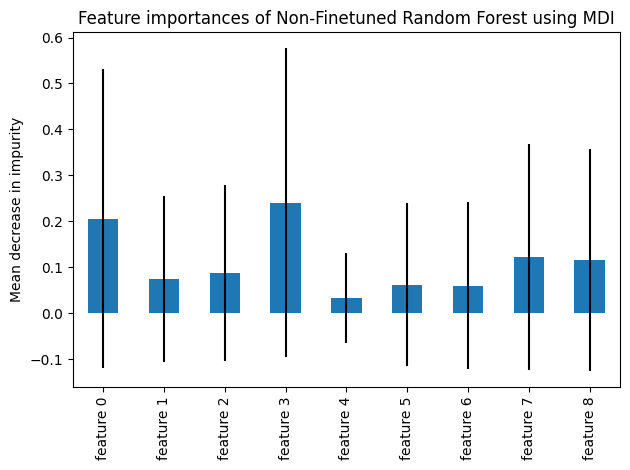

In [17]:
# Plotting Feature Importances of Non-Finetuned RandomForest
# Refer to https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

# Get feature importance
importances = clf.feature_importances_
print("Feature Importances:", importances)

feature_names = [f"feature {i}" for i in range(X.shape[1])]
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances of Non-Finetuned Random Forest using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [18]:
y_prob = clf.predict_proba(X_test)

# Probability of being 'con' or 'nat'
con_probabilities = y_prob[:, 0]

# Flag potential outliers based on low probability (< 0.3 confidence for 'con')
outliers = con_probabilities < 0.3
print("Potential outliers:", X_test[outliers])

Potential outliers:     Avg Word Length  Avg Sentence Length     TTR  MATTR  Char Dist Entr  \
10            6.248               14.951  14.890  0.825           4.553   
20            5.375               15.055  11.727  0.747           4.468   

    Word Dist Entr  Text Entr  Lex Entr  Rev Lex Entr  
10          12.905      4.316     1.651         1.685  
20          11.512      4.643     1.728         1.796  


In [11]:
# Random Forest With Finetuning (Best CLF)

X, y = data.iloc[:,2:].values.round(decimals=3), data.iloc[:,1].map({'con':0, 'nat':1}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_clf = RandomForestClassifier(**best_params)
best_clf.fit(X_train, y_train)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(n_estimators=50)

In [12]:
#  Measuring Finetuned Random Forest's Performance

y_pred = best_clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['con', 'nat'])
print(report)

              precision    recall  f1-score   support

         con       0.50      1.00      0.67         1
         nat       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



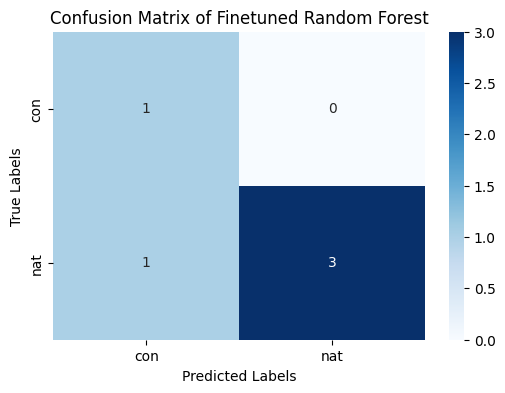

In [19]:
# Confusion Matrix for Finetuned Random Forest's Performance

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['con', 'nat'], yticklabels=['con', 'nat'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Finetuned Random Forest')
plt.show()

Feature Importances: [0.08289055 0.04255595 0.03130952 0.34742098 0.03032589 0.08777472
 0.03259881 0.13613827 0.20898531]


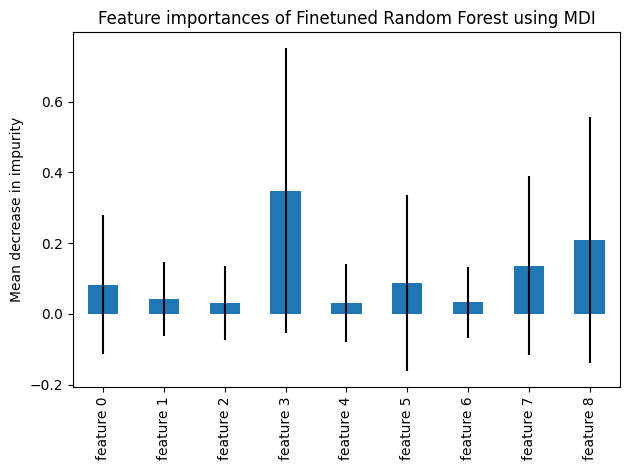

In [20]:
# Plotting Feature Importances of Finetuned RandomForest
# Refer to https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

# Get feature importance
importances = best_clf.feature_importances_
print("Feature Importances:", importances)

feature_names = [f"feature {i}" for i in range(X.shape[1])]
std = np.std([tree.feature_importances_ for tree in best_clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances of Finetuned Random Forest using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Isolation Forest

In [23]:
# Isolation Forest without Finetuning

X, y = data.iloc[:,2:].values.round(decimals=3), data.iloc[:,1].map({'con':0, 'nat':1}).values
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X)

predictions = clf.predict(X)
predicted_types = ['con' if p == -1 else 'nat' for p in predictions]

print(confusion_matrix(y, predicted_types))
print(classification_report(y, predicted_types, target_names=['con', 'nat']))

[[ 1  5]
 [ 2 16]]
              precision    recall  f1-score   support

         con       0.33      0.17      0.22         6
         nat       0.76      0.89      0.82        18

    accuracy                           0.71        24
   macro avg       0.55      0.53      0.52        24
weighted avg       0.65      0.71      0.67        24



Binary Classification (SVM)

In [ ]:
# # Preprocess
# data = preprocess_text(corpora, classification='binary')
# text, labels = [d[0] for d in data], [d[1] for d in data]
# vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(1,2))
# vectorizer.fit(text)
# text = vectorizer.transform(text)

# # Split 
# X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=42, shuffle=True)

# # Model
# clf = SGDClassifier(loss="log_loss", tol=1e-3, verbose=0, random_state=42, validation_fraction=0.1)
# batch_size = 10000
# num_batches = X_train.shape[0] // batch_size

# # Training
# for i in range(num_batches):
#     start = i * batch_size
#     end = min((i + 1) * batch_size, X_train.shape[0])
#     batch_x, batch_y = X_train[start:end], y_train[start:end]
#     clf.fit(batch_x, batch_y)
    
# # Plot
# y_pred = clf.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)

# fig, ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='g', ax=ax)
# ax.set_xlabel('Predicted Labels')
# ax.set_ylabel('Actual Labels')
# ax.set_title('Confusion Matrix')
# plt.show()

# # Metrics
# accuracy = clf.score(X_test, y_test)
# print(f'Accuracy: {accuracy}')

Multi-Classification (SVM)

In [ ]:
# # Preprocess
# # functions from char_freq.ipynb
# data = preprocess_text(corpora, sequences=100000, classification='multi')
# text, labels = [d[0] for d in data], [d[1] for d in data]
# vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2,2))
# vectorizer.fit(text)
# text = vectorizer.transform(text)

# # Split 
# X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=42, shuffle=True)

# # Model
# clf = SGDClassifier(loss="log_loss", tol=1e-3, verbose=0, random_state=42, validation_fraction=0.1)
# batch_size = 10000
# num_batches = X_train.shape[0] // batch_size

# # Training
# for i in range(num_batches):
#     start = i * batch_size
#     end = min((i + 1) * batch_size, X_train.shape[0])
#     batch_x, batch_y = X_train[start:end], y_train[start:end]
#     clf.fit(batch_x, batch_y)
    
# # Plot
# y_pred = clf.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)

# fig, ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='g', ax=ax)
# ax.set_xlabel('Predicted Labels')
# ax.set_ylabel('Actual Labels')
# ax.set_title('Confusion Matrix')
# plt.show()

# # Metrics
# accuracy = clf.score(X_test, y_test)
# print(f'Accuracy: {accuracy}')

Multi-Classification (RNN)

In [ ]:
# # Preprocess
# data = preprocess_text(corpora, sequences=200000, classification='multi')
# text, labels = [d[0] for d in data], [d[1] for d in data]
# vectorizer = CountVectorizer(analyzer='char')
# vectorizer.fit(text)
# text = vectorizer.transform(text)

# # Split 
# X_train, X_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# avgs = []
# for corpus in corpora:
#     with open(corpus, 'r', encoding='utf-8') as f:
#         text = f.read().splitlines()
#         f.close()
#     longest = len(max(text))
#     avg = sum(map(len, text)) / len(text)
#     avgs.append(avg)
#     print(f'{corpus}: Longest sequence is {longest} char, average is {int(avg)} char.')
    
# print(f'Avg length is {int(sum(avgs) / len(avgs))}')